**READING THE CSV FILE FROM GOOGLE DRIVE**

In [ ]:
# Installing the PyDrive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticating the google drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Getting file ID and loading the CSV from the google drive
# # https://drive.google.com/file/d/1SSDL15lBh6uT_rCIJ96exMQG8YDtTe7Z/view?usp=sharing
fileDownloaded = drive.CreateFile({'id':'1SSDL15lBh6uT_rCIJ96exMQG8YDtTe7Z'})
fileDownloaded.GetContentFile('Maternal_Health_Risk_Dataset.csv')

**LOADING THE DATA FROM THE CSV FILE**
- Here, we are loading and reading the dataset using the pandas library and displaying the first ten rows.

In [ ]:
# load the training dataset
import pandas as pd
#Maternal_Health_Risk_Dataset = pd.read_csv('Maternal_Health_Risk_Dataset.csv')
Maternal_Health_Risk_Dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00639/Maternal%20Health%20Risk%20Data%20Set.csv")
Maternal_Health_Risk_Dataset.head(10)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
4,35,120,60,6.10,98.0,76,low risk
5,23,140,80,7.01,98.0,70,high risk
6,23,130,70,7.01,98.0,78,mid risk
7,35,85,60,11.00,102.0,86,high risk
8,32,120,90,6.90,98.0,70,mid risk
9,42,130,80,18.00,98.0,70,high risk


**CHANGING THE CATEGORICAL LABELS TO NUMERIC LABELS**
- Here we converted the categorical labels (low risk, mid risk and high risk) to numerical labels (0, 1, 2) for performing the classification task.

In [ ]:
#import pandas
import pandas as pd
 
# Convert Categorical Variable to Numeric values
Maternal_Health_Risk_Dataset['RiskLevel'].replace(['low risk', 'mid risk', 'high risk'],
                        [0, 1, 2], inplace=True)

# Setting random samples
sample = Maternal_Health_Risk_Dataset.sample()

# Display the data
Maternal_Health_Risk_Dataset.sample((10))


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
835,29,130,70,7.5,98.0,78,1
222,32,120,90,6.4,98.0,70,0
752,29,130,70,7.7,98.0,78,1
886,15,76,49,6.8,98.0,77,0
460,42,130,80,18.0,98.0,70,1
576,15,78,49,7.5,98.0,77,0
224,23,90,60,6.4,98.0,76,0
394,19,120,80,7.0,98.0,70,1
380,13,90,65,7.8,101.0,80,1
756,23,130,70,6.9,98.0,70,1


**EXPLORING THE DATASET CHECKING IF THERE ARE MISSING (NULL) VALUES**
- This is another data preprocessing that check whether there missing or null value. As can be seen below, there are no missing or null values from the dataset.

In [ ]:
# Count the number of null values for each column
Maternal_Health_Risk_Dataset.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

**CREATING THE CLASSIFICATION CLASS AND REVEALING THE RISK CLASS LABELS**
- We created a classification class here and called it risk_classes. The risk classes are: 'Low Risk', 'Mid Risk', and 'High Risk'. This will enable us to perform  the classification task.

In [ ]:
risk_classes = ['Low Risk', 'Mid Risk', 'High Risk']
print(sample.columns[0:7].values, 'Risk Class')
for index, row in Maternal_Health_Risk_Dataset.sample(10).iterrows():
    print('[',row[0], row[1], row[2], row[3], row[4], row[5], int(row[6]),']', risk_classes[int(row[6])])

['Age' 'SystolicBP' 'DiastolicBP' 'BS' 'BodyTemp' 'HeartRate' 'RiskLevel'] Risk Class
[ 19.0 120.0 85.0 7.0 98.0 60.0 0 ] Low Risk
[ 25.0 140.0 100.0 7.2 98.0 80.0 2 ] High Risk
[ 23.0 120.0 90.0 7.8 98.0 60.0 1 ] Mid Risk
[ 21.0 90.0 65.0 6.9 98.0 76.0 1 ] Mid Risk
[ 28.0 120.0 90.0 6.9 98.0 70.0 0 ] Low Risk
[ 25.0 120.0 80.0 6.8 98.0 66.0 1 ] Mid Risk
[ 30.0 120.0 80.0 7.5 101.0 76.0 1 ] Mid Risk
[ 50.0 120.0 80.0 7.0 98.0 70.0 1 ] Mid Risk
[ 40.0 120.0 75.0 7.7 98.0 70.0 2 ] High Risk
[ 25.0 100.0 90.0 6.9 98.0 76.0 0 ] Low Risk


**SEPARATING THE FEATURES FROM THE LABELS**
- Since this is a classification project, we need to separate the features from the labels from our dataset. Therefore, below is the implementation of separating the features from the labels. 

In [ ]:
# Separate features and labels
features = ['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']
label = 'RiskLevel'
X, y = Maternal_Health_Risk_Dataset[features].values, Maternal_Health_Risk_Dataset[label].values

for n in range(0,5):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Patient 1 
  Features: [25.0, 130.0, 80.0, 15.0, 98.0, 86.0] 
  Label: 2
Patient 2 
  Features: [35.0, 140.0, 90.0, 13.0, 98.0, 70.0] 
  Label: 2
Patient 3 
  Features: [29.0, 90.0, 70.0, 8.0, 100.0, 80.0] 
  Label: 2
Patient 4 
  Features: [30.0, 140.0, 85.0, 7.0, 98.0, 70.0] 
  Label: 2
Patient 5 
  Features: [35.0, 120.0, 60.0, 6.1, 98.0, 76.0] 
  Label: 0


**Dataset Description**
* This is just viewing the description of the dataset.

In [ ]:
Maternal_Health_Risk_Dataset.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,0.867850
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,0.807353
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,0.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,0.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,1.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,2.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,2.000000


**EXPLORING THE DATA FEATURES USING HISTOGRAM**
*   Here we are exploring the features within the dataset using histograms (distplot).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


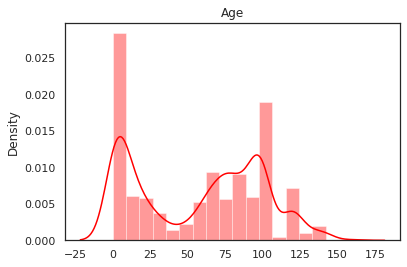

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


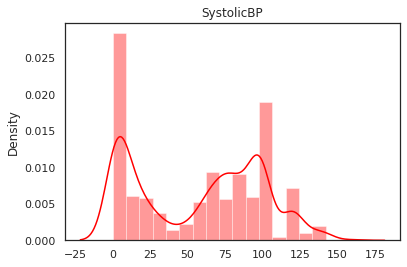

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


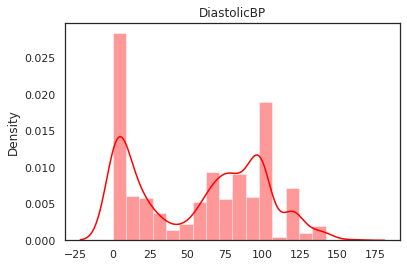

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


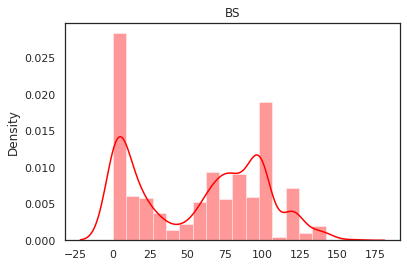

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


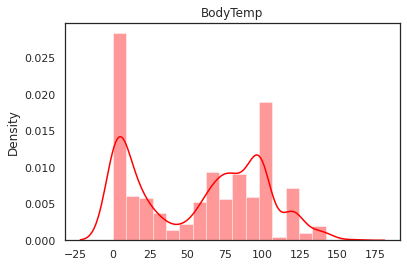

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


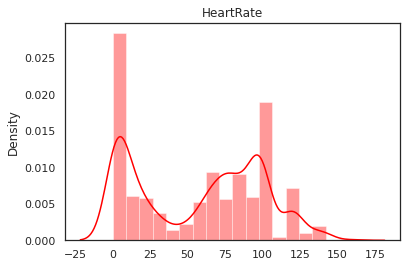

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

features = ['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']
for col in features:
  sns.set( style = "white" )
  rs = Maternal_Health_Risk_Dataset
  ax = sns.distplot(rs, kde = True, color = "red")

  ax.set_title(col)
  plt.show()

**MULTICOLLINEARITY USING VIF**
* This is another data preprocessing activities whereby we check the multicollinearity of each feature in the dataset using Variance Inflation Factor.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# The dataset
data = Maternal_Health_Risk_Dataset 

# the independent variables set
X = data[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["FEATURES"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

      FEATURES         VIF
0          Age    8.329186
1   SystolicBP  105.681497
2  DiastolicBP   85.306370
3           BS   11.670358
4     BodyTemp  126.771068
5    HeartRate   89.539839


**PREPARING AND SPLITTING THE DATA FOR TRAINING AND VALIDATION**
* Here we split the dataset into the training set (70%) and testing set (30%).
* The training set will be used in training the models while the testing set is for validating the trained models' performance.

In [ ]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 0, stratify=y)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 709
Test cases: 305


**SMOTE TECHNIQUE (ANALYSIS)**
* SMOTE technique is used in situations where inbalance exist within the data.
* We used the SMOTE technique with the LabelEncoder from the sklearn.preprocessing to create a balanced data.
* We also plot the unbalanced and the balanced data for better visualization.

In [ ]:
import numpy as np
a = np.array([y_train])
#y_train.value_counts()
unique, counts = np.unique(a, return_counts=True)
dict(zip(unique, counts))

{0: 284, 1: 235, 2: 190}

Class=2, n=272 (26.824%)
Class=0, n=406 (40.039%)
Class=1, n=336 (33.136%)


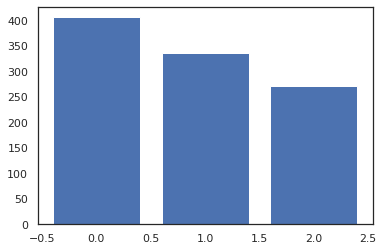

In [ ]:
# load and summarize the dataset
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# define the dataset location
url = Maternal_Health_Risk_Dataset

# load the csv file as a data frame
data = url.values

# split into input and output elements
X, y = data[:, :-1], data[:, -1]

# label encode the target variable
y = LabelEncoder().fit_transform(y)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=2, n=406 (33.333%)
Class=0, n=406 (33.333%)
Class=1, n=406 (33.333%)


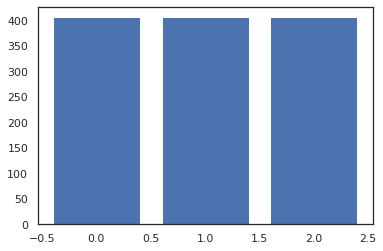

In [ ]:
# example of oversampling a multi-class classification dataset
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder


# define the dataset location
url2 = Maternal_Health_Risk_Dataset


# load the csv file as a data frame
#df = read_csv(url, header=None)
data = url2.values


# split into input and output elements
X, y = data[:, :-1], data[:, -1]

# label encode the target variable
y = LabelEncoder().fit_transform(y)

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))


# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

**CORRELATION MATRIX**  
* Here we implemented the correlation matrix thats shows the relationship between the features within the dataset.

In [ ]:
import seaborn as sns

data = Maternal_Health_Risk_Dataset
df = pd.DataFrame(data)

corr_matrix = df.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.416045,0.398026,0.473284,-0.255323,0.079798,0.267225
SystolicBP,0.416045,1.000000,0.787006,0.425172,-0.286616,-0.023108,0.396473
DiastolicBP,0.398026,0.787006,1.000000,0.423824,-0.257538,-0.046151,0.346649
BS,0.473284,0.425172,0.423824,1.000000,-0.103493,0.142867,0.569942
BodyTemp,-0.255323,-0.286616,-0.257538,-0.103493,1.000000,0.098771,0.163984
HeartRate,0.079798,-0.023108,-0.046151,0.142867,0.098771,1.000000,0.194312
RiskLevel,0.267225,0.396473,0.346649,0.569942,0.163984,0.194312,1.000000


**TRAINING AND EVALUATE A MULTICLASS CLASSIFIER**

**IMPLEMENTING LOGISTIC REGRESSION WITH HYPER PARAMETERS**
* Here the Logistic Regression was implemented with Hyperparameters tuning using the GridSearchCV

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Set the parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'solver': ['liblinear'], 'multi_class': ['auto'], 'max_iter':[10000]}

# train a logistic regression model on the training set
model = LogisticRegression()

# Use GridSearchCV to perform the hyperparameter tuning
multi_model = GridSearchCV(model, param_grid, cv=5)
multi_model.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", multi_model.best_params_)
print("Best score:", multi_model.best_score_)
print(multi_model)

Best parameters: {'C': 10, 'max_iter': 10000, 'multi_class': 'auto', 'solver': 'liblinear'}
Best score: 0.6191988812306463
GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'max_iter': [10000],
                         'multi_class': ['auto'], 'solver': ['liblinear']})


**COMPARING THE ACTUAL AND THE PREDICTED**
* The printout of the comparation between the actual and the predicted labels can also be seen below.

In [ ]:
# Printing the actual labels and the predicted labels
#predictions = multi_model.predict(X_test)
predictions = multi_model.predict(X_test)
print('Predicted labels:', predictions[:30])
print('Actual labels:   ' ,y_test[:30])

Predicted labels: [2 1 2 1 0 0 2 0 1 2 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 2 2 0 0 0]
Actual labels:    [2 1 2 2 1 1 2 2 2 2 0 1 0 0 1 0 2 2 2 1 2 1 0 0 0 2 2 1 0 2]


**PRINTING THE ACCURACY REPORT FOR LOGISTIC REGRESSION**

In [ ]:
# Printing the prediction accuracy
from sklearn.metrics import accuracy_score
result = accuracy_score(y_test, predictions)

#Formatting the output to 2 decimal places & print it
formatted_result = '{0:.2f}'.format(result)
print('Accuracy: ', formatted_result)

Accuracy:  0.58


**PRINTING THE CLASSIFICATION REPORT THAT CONTAINS THE FOLLOWING**
* The Precision
* The Recall
* F1 Score and 
* The Accuracy score of the model

In [ ]:
# Importing the classification report functionality from sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.56      0.80      0.66       122
           1       0.46      0.32      0.37       101
           2       0.80      0.60      0.69        82

    accuracy                           0.58       305
   macro avg       0.61      0.57      0.57       305
weighted avg       0.59      0.58      0.57       305



**PRINTING THE OVERALL METRICS**

In [ ]:
# Importing the precision score and recall score from sklearn
from sklearn.metrics import precision_score, recall_score

# Printing the Overall metrics scores
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))

Overall Accuracy: 0.5836065573770491
Overall Precision: 0.6059642700117545
Overall Recall: 0.5698248753303958


**PRINTING THE CONFUSION MATRIX FOR LOGISTIC REGRESSION**

In [ ]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[97 24  1]
 [58 32 11]
 [19 14 49]]


**Heat Map for the Confusion Matrix obtained using the Logistic Regression Model**

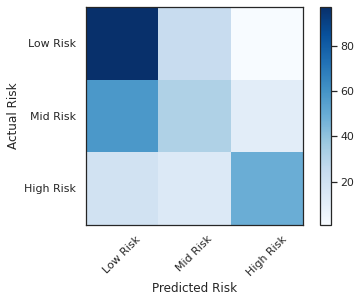

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(risk_classes))
plt.xticks(tick_marks, risk_classes, rotation=45)
plt.yticks(tick_marks, risk_classes)
plt.xlabel("Predicted Risk")
plt.ylabel("Actual Risk")
plt.show()

**Plotting the ROC curve for Logistic Regression**

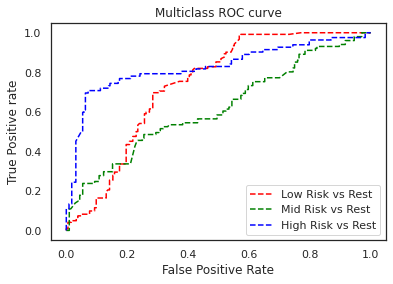

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Get class probability scores
maternal_prob = multi_model.predict_proba(X_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(risk_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, maternal_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label=risk_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=risk_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=risk_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

**Calculating the aggregate area under the curve score - Logistic Regression**

In [ ]:
auc = roc_auc_score(y_test, maternal_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.7261868640478232


**SUPPORT VECTOR MACHINE IMPLEMENTATION**
* Training the Data with SVM Algorithm with Hyper Parameters

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Set the parameter grid for SVC
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'degree':[1, 2, 3], 'gamma': ['scale', 'auto']}

# train a SVC model on the training set
svm_multi_model = SVC(probability=True)
#svm_multi_model = SVC(probability=True)

# Use GridSearchCV to perform the hyperparameter tuning
svm_multi_model = GridSearchCV(svm_multi_model, param_grid, cv=5)
svm_multi_model.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", svm_multi_model.best_params_)
print("Best score:", svm_multi_model.best_score_)

Best parameters: {'C': 100, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best score: 0.7644590949955049


**Comparing the SVM Prediction with the Actual Labels**
* The printout of the comparation between the actual and the predicted labels can also be seen below.

In [ ]:
# Printing the actual labels and the predicted labels
svm_predictions = svm_multi_model.predict(X_test)
print('Predicted labels:', svm_predictions[:20])
print('Actual labels:   ' ,y_test[:20])

Predicted labels: [2 0 2 2 1 0 2 0 2 2 0 1 1 0 0 0 0 2 2 1]
Actual labels:    [2 1 2 2 1 1 2 2 2 2 0 1 0 0 1 0 2 2 2 1]


**SVM Accuracy Score**

In [ ]:
# Printing the prediction accuracy
from sklearn.metrics import accuracy_score
result = accuracy_score(y_test, svm_predictions)

#Formatting the output to 2 decimal places & print it
formatted_result = '{0:.2f}'.format(result)
print('Accuracy: ', formatted_result)

Accuracy:  0.76


**SVM Classification Report**
* The Precision
* The Recall
* F1 Score and 
* The Accuracy score of the model

In [ ]:
# Importing the classification report functionality from sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       122
           1       0.76      0.69      0.73       101
           2       0.82      0.77      0.79        82

    accuracy                           0.76       305
   macro avg       0.77      0.76      0.76       305
weighted avg       0.76      0.76      0.76       305



**Printing the SVM Precision, Recall and Accuracy Scores**

In [ ]:
# Importing the precision score and recall score from sklearn
from sklearn.metrics import precision_score, recall_score

# Printing the Overall metrics scores
print("Overall Accuracy:",accuracy_score(y_test, svm_predictions))
print("Overall Precision:",precision_score(y_test, svm_predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, svm_predictions, average='macro'))

Overall Accuracy: 0.760655737704918
Overall Precision: 0.7689975199565993
Overall Recall: 0.7576124665645292


**SVM Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm2 = confusion_matrix(y_test, svm_predictions)
print (cm2)

[[99 19  4]
 [21 70 10]
 [16  3 63]]


**Heatmap Plot for the SVM Confusion Matrix**

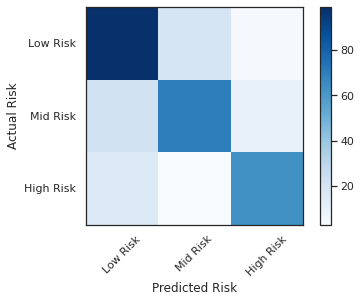

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(cm2, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(risk_classes))
plt.xticks(tick_marks, risk_classes, rotation=45)
plt.yticks(tick_marks, risk_classes)
plt.xlabel("Predicted Risk")
plt.ylabel("Actual Risk")
plt.show()

**ROC Curve Plot for the SVM ALgorithm**

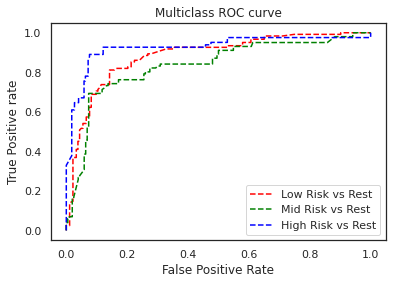

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#multi_model = SVC(probability=True)

# Get class probability scores
svm_maternal_prob = svm_multi_model.predict_proba(X_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(risk_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, svm_maternal_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label=risk_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=risk_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=risk_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

**Calculating the AUC**

In [ ]:
auc = roc_auc_score(y_test, svm_maternal_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.8809519759639436


**K-NEAREST NEIGHBOUR IMPLEMENTATION**
* K-NN training the model and performing Hyperparameters tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_params = { 'n_neighbors' : [1,3,5,7,9,11,13,15,17,19],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(X_train, y_train)

# find the best score
g_res.best_score_

# get the hyperparameters with the best score
g_res.best_params_

Fitting 3 folds for each of 60 candidates, totalling 180 fits


{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}

**Predicting using K-NN**
* The printout of the comparation between the actual and the predicted labels can also be seen below.

In [ ]:
knn_predictions = (g_res.predict(X_test))
print('Predicted labels:', knn_predictions[:30])
print('Actual labels:   ' , y_test[:30])
print(' ')

Predicted labels: [2 1 2 2 1 0 2 0 2 2 0 1 1 0 1 0 0 2 2 1 1 1 0 0 1 2 2 1 0 2]
Actual labels:    [2 1 2 2 1 1 2 2 2 2 0 1 0 0 1 0 2 2 2 1 2 1 0 0 0 2 2 1 0 2]
 


**Printing Precision, Accuracy and Recall Score for K-NN**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
# Overall metrics
print("Overall Accuracy:",'{0:.2f}'.format(accuracy_score(y_test, knn_predictions)))
print("Overall Precision:",'{0:.2f}'.format(precision_score(y_test, knn_predictions, average='macro')))
print("Overall Recall:",'{0:.2f}'.format(recall_score(y_test, knn_predictions, average='macro')))
print(' ')

Overall Accuracy: 0.79
Overall Precision: 0.80
Overall Recall: 0.79
 


**K-Nearest Neighbours Classification Report**
* The Precision
* The Recall
* F1 Score and 
* The Accuracy score of the model

In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       122
           1       0.75      0.76      0.76       101
           2       0.83      0.82      0.82        82

    accuracy                           0.79       305
   macro avg       0.80      0.79      0.79       305
weighted avg       0.79      0.79      0.79       305



**K-Nearest Neighbours Confusion Matrix**

In [ ]:
#Import statement
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
knn_cm = confusion_matrix(y_test, knn_predictions)
print (knn_cm)

[[98 18  6]
 [16 77  8]
 [ 8  7 67]]


**K-Nearest Neighbours Confusion Matrix Heatmap**

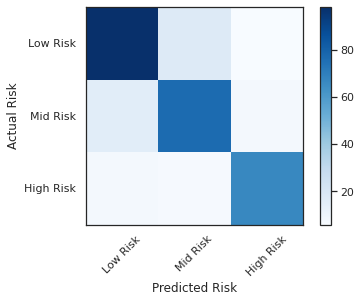

In [ ]:
import numpy as np

%matplotlib inline

plt.imshow(knn_cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(risk_classes))
plt.xticks(tick_marks, risk_classes, rotation=45)
plt.yticks(tick_marks, risk_classes)
plt.xlabel("Predicted Risk")
plt.ylabel("Actual Risk")
print("")
plt.show()

**K-Nearest Neighbours ROC Curve**

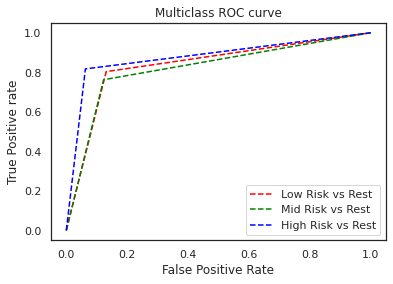

In [ ]:
#Import statement
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Get class probability scores
KNN_maternal_prob = g_res.predict_proba(X_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(risk_classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, KNN_maternal_prob[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label=risk_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=risk_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=risk_classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

**Calculating the aggregate area under the curve score**

In [ ]:
auc = roc_auc_score(y_test, KNN_maternal_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.8443752112050523


**Plotting a Bar chart comparing the Accuracy scores of the three classification models**

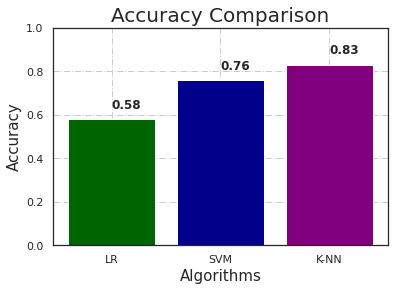

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
x = np.array([0.58, 0.76, 0.83])
y = ["LR", "SVM", "K-NN"]

# Plotting the bar chart
plt.bar(y, x, color = ('darkgreen', 'darkblue', 'purple'))
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.title('Accuracy Comparison', fontsize=20)
plt.ylim(0,1)
plt.grid(True, linestyle='-.')

# Adding values above each bar
for i, v in enumerate(x):
    plt.text(i, v + 0.05, str(round(v, 2)), fontweight='bold', fontsize=12)

# Show the plot
plt.show()

**Plot a Grouped Bar Chart for Precision Scores for Risk classes in relation to the three classification model**

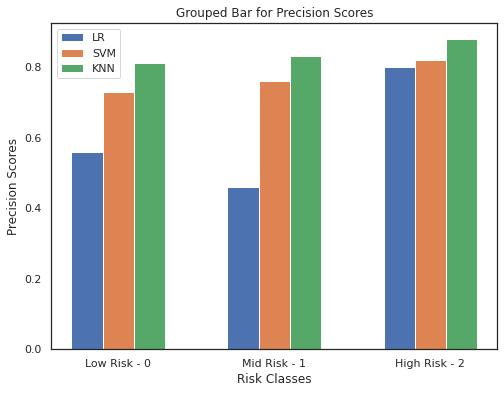

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create some example data
LR = [0.56, 0.46,0.80]
SVM = [0.73,0.76,0.82]
KNN = [0.81,0.83,0.88]

fig = plt.figure(figsize=(8, 6))

# Create the bar chart
ax = fig.add_subplot(111)
bar_width = 0.2
bar1 = ax.bar(np.arange(len(LR)), LR, bar_width)
bar2 = ax.bar(np.arange(len(SVM)) + bar_width, SVM, bar_width)
bar3 = ax.bar(np.arange(len(KNN)) + bar_width*2, KNN, bar_width)

ax.set_xticks(np.arange(len(LR))+bar_width)
ax.set_xticklabels(['Low Risk - 0', 'Mid Risk - 1', 'High Risk - 2'])

# Add labels and a title
ax.set_xlabel('Risk Classes')
ax.set_ylabel('Precision Scores')
ax.set_title('Grouped Bar for Precision Scores')
ax.legend((bar1[0], bar2[0], bar3[0]), ('LR', 'SVM', 'KNN'))

# Show the chart
plt.show()

**Plot a Grouped Bar Chart for Recall Scores for Risk classes in relation to the three classification model** 

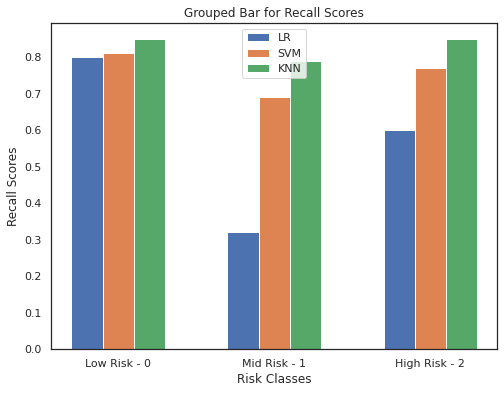

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create some example data
LR = [0.80, 0.32,0.60]
SVM = [0.81,0.69,0.77]
KNN = [0.85,0.79,0.85]

fig = plt.figure(figsize=(8, 6))

# Create the bar chart
ax = fig.add_subplot(111)
bar_width = 0.2
bar1 = ax.bar(np.arange(len(LR)), LR, bar_width)
bar2 = ax.bar(np.arange(len(SVM)) + bar_width, SVM, bar_width)
bar3 = ax.bar(np.arange(len(KNN)) + bar_width*2, KNN, bar_width)

ax.set_xticks(np.arange(len(LR))+bar_width)
ax.set_xticklabels(['Low Risk - 0', 'Mid Risk - 1', 'High Risk - 2'])

# Add labels and a title
ax.set_xlabel('Risk Classes')
ax.set_ylabel('Recall Scores')
ax.set_title('Grouped Bar for Recall Scores')
ax.legend((bar1[0], bar2[0], bar3[0]), ('LR', 'SVM', 'KNN'))

# Show the chart
plt.show()

**Plot a Grouped Bar Chart for F1 Score for Risk classes in relation to the three classification model**

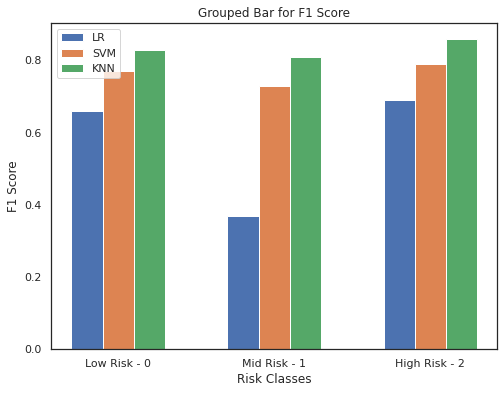

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create some example data
LR = [0.66, 0.37,0.69]
SVM = [0.77,0.73,0.79]
KNN = [0.83,0.81,0.86]

fig = plt.figure(figsize=(8, 6))

# Create the bar chart
ax = fig.add_subplot(111)
bar_width = 0.2
bar1 = ax.bar(np.arange(len(LR)), LR, bar_width)
bar2 = ax.bar(np.arange(len(SVM)) + bar_width, SVM, bar_width)
bar3 = ax.bar(np.arange(len(KNN)) + bar_width*2, KNN, bar_width)

ax.set_xticks(np.arange(len(LR))+bar_width)
ax.set_xticklabels(['Low Risk - 0', 'Mid Risk - 1', 'High Risk - 2'])

# Add labels and a title
ax.set_xlabel('Risk Classes')
ax.set_ylabel('F1 Score')
ax.set_title('Grouped Bar for F1 Score')
ax.legend((bar1[0], bar2[0], bar3[0]), ('LR', 'SVM', 'KNN'))

# Show the chart
plt.show()

**SAVING THE MATERNAL MODEL**

In [ ]:
import joblib

# Save the model as a pickle file
filename = './maternal_model.pkl'
joblib.dump(multi_model, filename_k_nn)